# Exercises - Data Wrangling

***Acquire and Summarize***

1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

***Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for*** airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import env

from env import host, username, password
from sklearn.model_selection import train_test_split


In [2]:
sql_url = env.get_connection('zillow')

In [3]:
query = '''
        SELECT *
        FROM properties_2017 
        JOIN predictions_2017 USING(parcelid)
        WHERE transactiondate >= '2017-01-01' AND transactiondate <= '2017-12-31' 
        AND latitude != 'NULL' AND longitude != 'NULL';
        '''

In [4]:
df = pd.read_sql(query, sql_url)

In [5]:
df.shape

(77579, 62)

In [6]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,2017-01-01
4,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,4,0.006940,2017-01-01


In [7]:
df = df.drop_duplicates('parcelid')

In [8]:
df.shape

(77381, 62)

In [9]:
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,2017-01-01
4,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,4,0.006940,2017-01-01


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [10]:
df.describe()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,7.738100e+04,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,...,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000
mean,1.300715e+07,1.495139e+06,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,...,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38847.882878,0.016910
std,3.481346e+06,8.609071e+05,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,...,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.159593,0.169247
min,1.071186e+07,3.490000e+02,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,1.153830e+07,7.520700e+05,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,...,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19460.000000,-0.024138
50%,1.253157e+07,1.497932e+06,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,...,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38869.000000,0.006738
75%,1.421183e+07,2.240535e+06,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,...,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58252.000000,0.039310
max,1.676893e+08,2.982274e+06,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77612.000000,5.262999


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77578
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77381 non-null  int64  
 1   id                            77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

In [12]:
df.dtypes

parcelid                      int64
id                            int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
taxdelinquencyyear          float64
censustractandblock         float64
id                            int64
logerror                    float64
transactiondate              object
Length: 62, dtype: object

In [13]:
df.shape

(77381, 62)

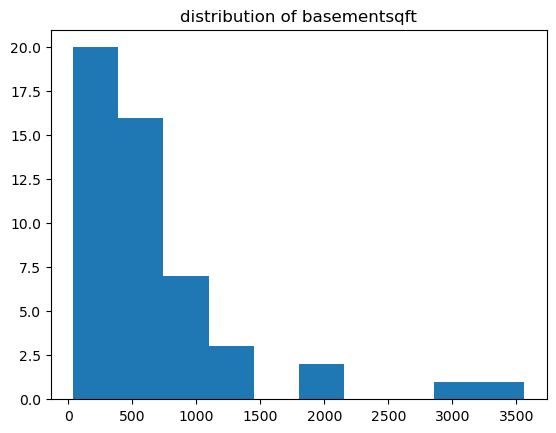

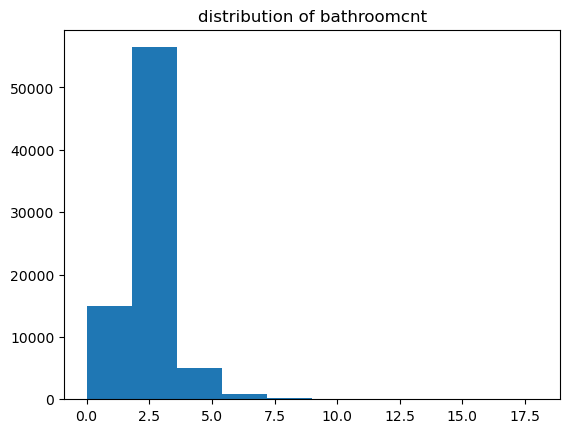

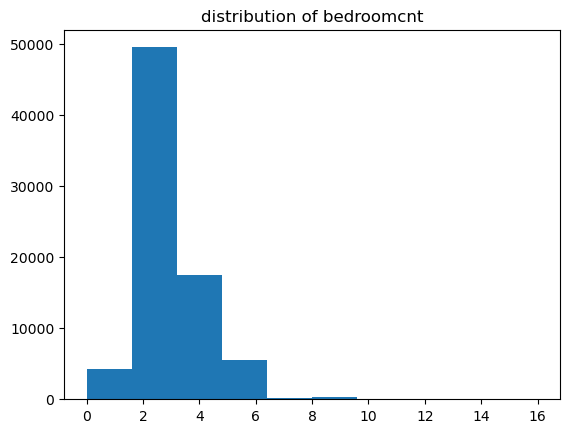

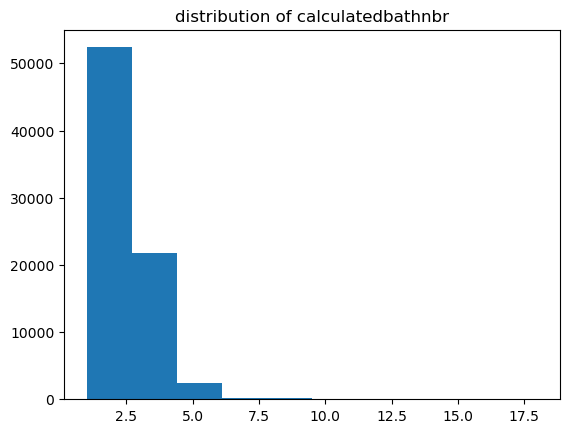

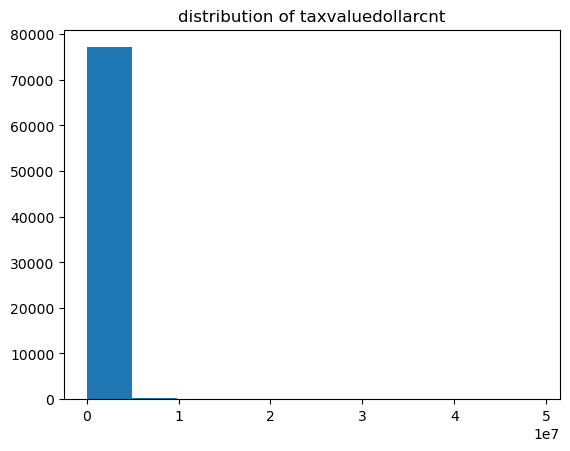

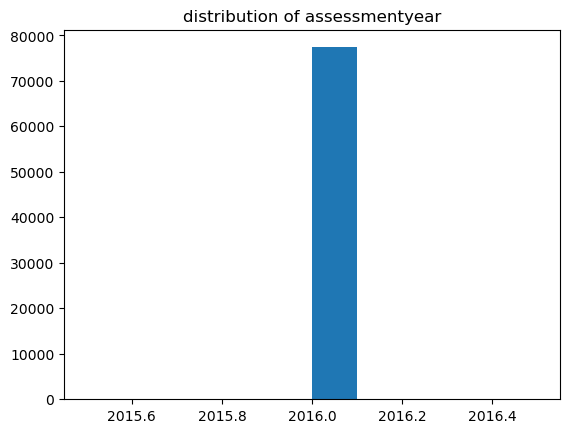

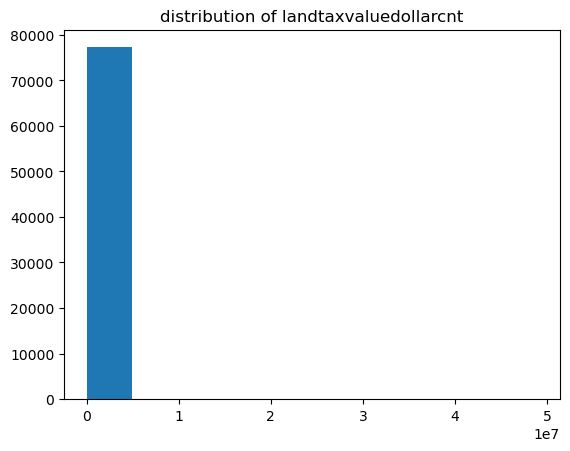

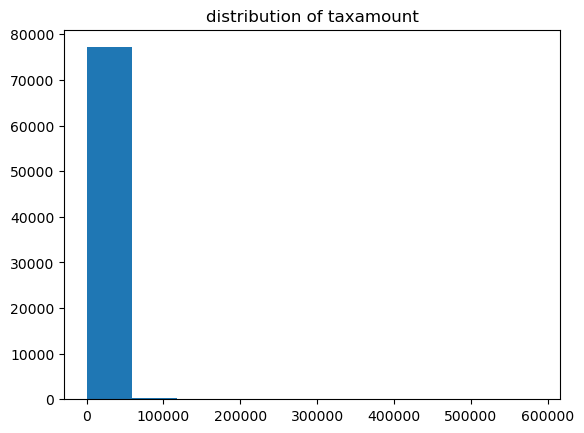

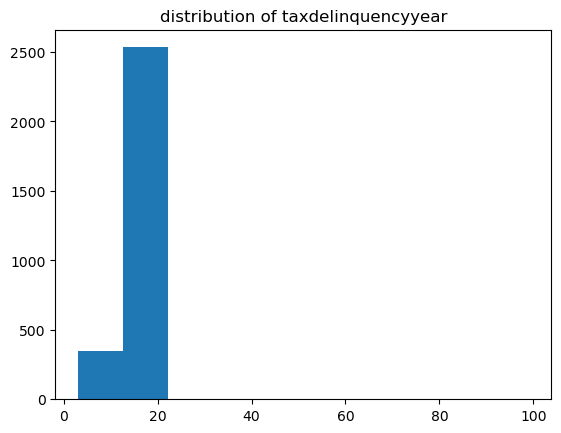

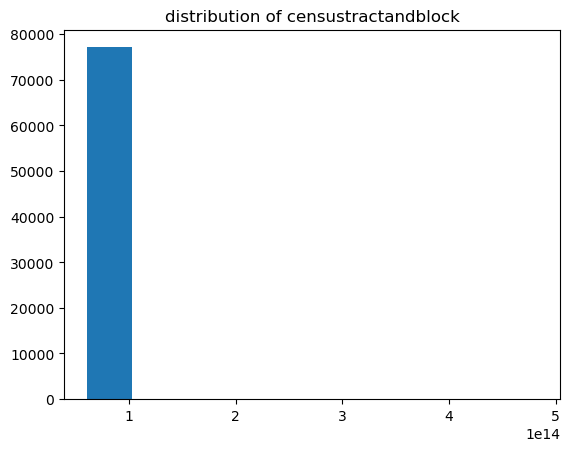

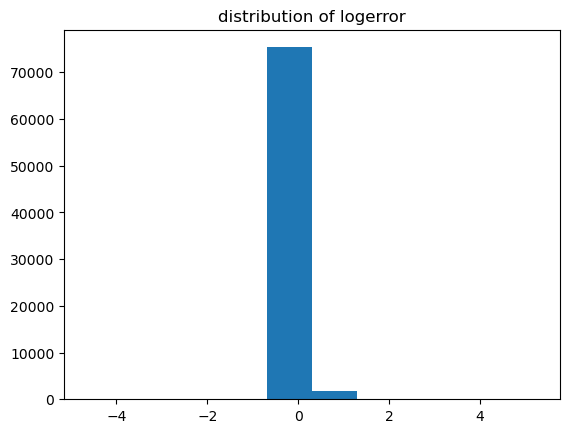

In [14]:
num_cols = ['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear', 'censustractandblock', 'logerror']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [15]:
df.value_counts

<bound method DataFrame.value_counts of        parcelid       id  airconditioningtypeid  architecturalstyletypeid  \
0      14297519  1727539                    NaN                       NaN   
1      17052889  1387261                    NaN                       NaN   
2      14186244    11677                    NaN                       NaN   
3      12177905  2288172                    NaN                       NaN   
4      10887214  1970746                    1.0                       NaN   
...         ...      ...                    ...                       ...   
77574  10833991  2864704                    1.0                       NaN   
77575  11000655   673515                    NaN                       NaN   
77576  17239384  2968375                    NaN                       NaN   
77577  12773139  1843709                    1.0                       NaN   
77578  12826780  1187175                    NaN                       NaN   

       basementsqft  bathroomcnt  b

In [49]:
df.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,261.0,12612840,1514581,2.0,3.0,6.0,2.0,1540.0,1540.0,6037.0,...,29440.0,63380.0,2016.0,33940.0,1104.70,6.037670e+13,889,0.079772,2017-01-05,Single Family Residential
1,261.0,12611007,216904,2.0,3.0,6.0,2.0,1470.0,1470.0,6037.0,...,71733.0,182691.0,2016.0,110958.0,2506.91,6.037670e+13,888,0.100001,2017-01-05,Single Family Residential
2,261.0,12023386,304078,2.0,2.0,8.0,2.0,1533.0,1533.0,6037.0,...,52583.0,87557.0,2016.0,34974.0,1229.29,6.037194e+13,886,-0.006511,2017-01-05,Single Family Residential
3,261.0,11647399,1943418,4.0,3.0,9.0,4.0,2268.0,2268.0,6037.0,...,337583.0,1687919.0,2016.0,1350336.0,20436.93,6.037265e+13,883,0.006355,2017-01-05,Single Family Residential
4,261.0,10780171,90918,3.0,3.0,8.0,3.0,2220.0,2220.0,6037.0,...,167789.0,225746.0,2016.0,57957.0,2851.71,6.037133e+13,882,-0.059383,2017-01-05,Single Family Residential


3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

The output should look like the table below:

In [70]:
def missing_rows(df):
    
    missing_data = df.isna()
    total_missing_data = missing_data.sum()
    perc_missing = total_missing_data / len(df)
    
    miss_table = pd.concat([total_missing_data, perc_missing], axis=1)

    miss_table_new = miss_table.rename(
            columns = {0 : 'num_rows_missing', 1 : 'pct_rows_missing'})

    new_df = pd.DataFrame(miss_table_new)
    
    return new_df

missing_rows(df).sort_values(by='pct_rows_missing', ascending=False)

,num_rows_missing,pct_rows_missing
buildingqualitytypeid,18636,0.355812
propertyzoningdesc,18539,0.353960
unitcnt,18529,0.353769
heatingorsystemtypeid,18441,0.352089
regionidcity,1031,0.019685
lotsizesquarefeet,360,0.006873
finishedsquarefeet12,182,0.003475
censustractandblock,114,0.002177
structuretaxvaluedollarcnt,76,0.001451
calculatedbathnbr,72,0.001375


***Takeaway***

Because there are zero columns that are above 35 percent missing values, and a majority of the missing values fall below one percent. I would just use .dropna and drop all of the rows with missing data.

***Prepare***

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [17]:
query2 = '''
        SELECT *
        FROM properties_2017 
        JOIN predictions_2017 USING(parcelid)
        JOIN propertylandusetype USING(propertylandusetypeid)
        WHERE transactiondate >= '2017-01-01' AND transactiondate <= '2017-12-31' 
        AND latitude != 'NULL' AND longitude != 'NULL' 
        AND propertylandusedesc = 'Single Family Residential';
        '''

In [18]:
df = pd.read_sql(query2, sql_url)

In [19]:
df.head()

,propertylandusetypeid,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,261.0,12612840,1514581,NaN,NaN,NaN,2.0,3.0,None,6.0,...,2016.0,33940.0,1104.70,None,NaN,6.037670e+13,889,0.079772,2017-01-05,Single Family Residential
1,261.0,12611007,216904,NaN,NaN,NaN,2.0,3.0,None,6.0,...,2016.0,110958.0,2506.91,None,NaN,6.037670e+13,888,0.100001,2017-01-05,Single Family Residential
2,261.0,12023386,304078,NaN,NaN,NaN,2.0,2.0,None,8.0,...,2016.0,34974.0,1229.29,None,NaN,6.037194e+13,886,-0.006511,2017-01-05,Single Family Residential
3,261.0,11647399,1943418,NaN,NaN,NaN,4.0,3.0,None,9.0,...,2016.0,1350336.0,20436.93,None,NaN,6.037265e+13,883,0.006355,2017-01-05,Single Family Residential
4,261.0,10780171,90918,1.0,NaN,NaN,3.0,3.0,None,8.0,...,2016.0,57957.0,2851.71,None,NaN,6.037133e+13,882,-0.059383,2017-01-05,Single Family Residential


In [20]:
df.shape

(52441, 63)

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [21]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df
handle_missing_values(df, .6, .75)


,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,propertylandusedesc
0,261.0,12612840,1514581,2.0,3.0,6.0,2.0,1540.0,1540.0,6037.0,...,29440.0,63380.0,2016.0,33940.0,1104.70,6.037670e+13,889,0.079772,2017-01-05,Single Family Residential
1,261.0,12611007,216904,2.0,3.0,6.0,2.0,1470.0,1470.0,6037.0,...,71733.0,182691.0,2016.0,110958.0,2506.91,6.037670e+13,888,0.100001,2017-01-05,Single Family Residential
2,261.0,12023386,304078,2.0,2.0,8.0,2.0,1533.0,1533.0,6037.0,...,52583.0,87557.0,2016.0,34974.0,1229.29,6.037194e+13,886,-0.006511,2017-01-05,Single Family Residential
3,261.0,11647399,1943418,4.0,3.0,9.0,4.0,2268.0,2268.0,6037.0,...,337583.0,1687919.0,2016.0,1350336.0,20436.93,6.037265e+13,883,0.006355,2017-01-05,Single Family Residential
4,261.0,10780171,90918,3.0,3.0,8.0,3.0,2220.0,2220.0,6037.0,...,167789.0,225746.0,2016.0,57957.0,2851.71,6.037133e+13,882,-0.059383,2017-01-05,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,261.0,12276797,2094969,2.0,3.0,6.0,2.0,1034.0,1034.0,6037.0,...,97620.0,131921.0,2016.0,34301.0,2521.33,6.037543e+13,76916,-0.028895,2017-09-15,Single Family Residential
52437,261.0,13916119,1934674,1.5,3.0,NaN,1.5,1465.0,1465.0,6059.0,...,73179.0,302411.0,2016.0,229232.0,3729.82,6.059086e+13,76915,0.038980,2017-09-15,Single Family Residential
52438,261.0,11160423,286357,2.0,4.0,6.0,2.0,1312.0,1312.0,6037.0,...,165561.0,222740.0,2016.0,57179.0,3224.84,6.037911e+13,76914,0.011575,2017-09-15,Single Family Residential
52439,261.0,12280752,2109879,1.0,2.0,4.0,1.0,979.0,979.0,6037.0,...,92521.0,230455.0,2016.0,137934.0,3381.02,6.037541e+13,76913,-0.056117,2017-09-15,Single Family Residential


3. Encapsulate your work inside of functions in a wrangle_zillow.py module.

In [22]:
def get_connection(db, user=username, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_zillow_data():
    '''
    This function reads the zillow data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = """
            SELECT *
        FROM properties_2017 
        JOIN predictions_2017 USING(parcelid)
        JOIN propertylandusetype USING(propertylandusetypeid)
        WHERE transactiondate >= '2017-01-01' AND transactiondate <= '2017-12-31' 
        AND latitude != 'NULL' AND longitude != 'NULL' 
        AND propertylandusedesc = 'Single Family Residential';
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df

def acquire_zillow():
    '''
    This function reads in zillow data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:

        #creates new csv if one does not already exist
        df = get_zillow_data()
        df.to_csv('zillow.csv')

    return df

def prep_zillow(df, prop_required_column, prop_required_row):
    '''Prepares acquired zillow data for exploration'''
    
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df


### Mall Customers

Notebook

1. Acquire data from the customers table in the mall_customers database.


In [23]:
sql_url = env.get_connection('mall_customers')

In [24]:
query = '''
        SELECT *
        FROM customers;
        '''

In [25]:
mall_df = pd.read_sql(query, sql_url)

In [26]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Summarize the data (include distributions and descriptive statistics).

In [27]:
mall_df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
mall_df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

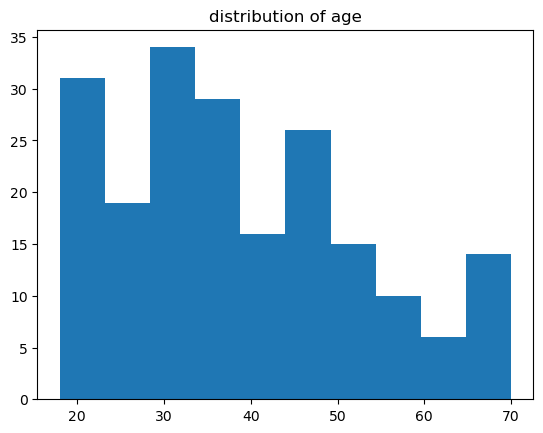

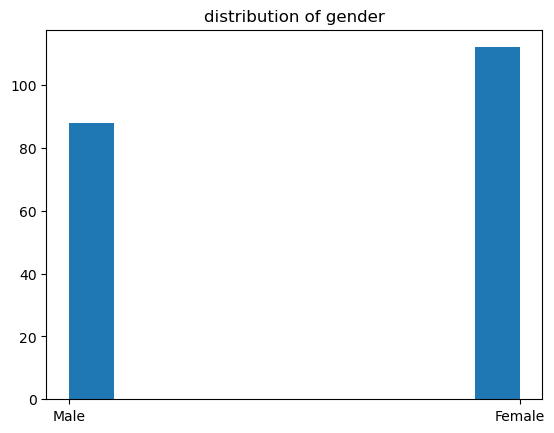

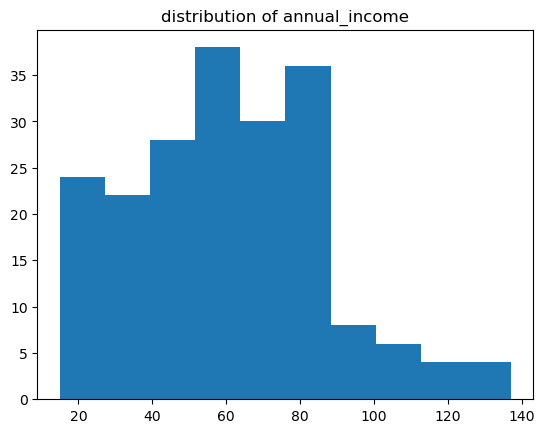

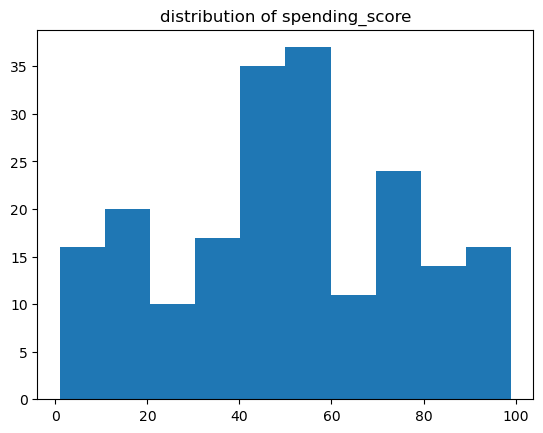

In [71]:
num_cols = ['age', 'gender', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(mall_df[col])
    plt.title(f'distribution of {col}')
    plt.show()

In [31]:
mall_df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

3. Detect outliers using IQR.

In [32]:
def upper_outlier_detector(dataframe, column, k=1.5):
    
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    return np.where(dataframe[column] > upper_bound, 1, 0)

def lower_outlier_detector(dataframe, column, k=1.5):
    
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    lower_bound = q1 - k * iqr
    
    return np.where(dataframe[column] < lower_bound, 1, 0)

In [33]:
my_list = ['age', 'annual_income', 'spending_score']

for col in my_list:
    
    mall_df[f'{col}_upper_outliers'] = upper_outlier_detector(mall_df, col)
    mall_df[f'{col}_lower_outliers'] = lower_outlier_detector(mall_df, col)
    
mall_df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,age_lower_outliers,annual_income_upper_outliers,annual_income_lower_outliers,spending_score_upper_outliers,spending_score_lower_outliers
0,1,Male,19,15,39,0,0,0,0,0,0
1,2,Male,21,15,81,0,0,0,0,0,0
2,3,Female,20,16,6,0,0,0,0,0,0
3,4,Female,23,16,77,0,0,0,0,0,0
4,5,Female,31,17,40,0,0,0,0,0,0


4. Split data into train, validate, and test.

In [34]:
train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
train.shape, validate.shape, test.shape

((112, 11), (48, 11), (40, 11))

5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [35]:
# Get dummies for non-binary categorical variables
dummy_df = pd.get_dummies(mall_df[['gender']], dummy_na=False)
    
# Concatenate dummy dataframe to original 
mall_df = pd.concat([mall_df, dummy_df], axis=1)

mall_df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,age_lower_outliers,annual_income_upper_outliers,annual_income_lower_outliers,spending_score_upper_outliers,spending_score_lower_outliers,gender_Female,gender_Male
0,1,Male,19,15,39,0,0,0,0,0,0,0,1
1,2,Male,21,15,81,0,0,0,0,0,0,0,1
2,3,Female,20,16,6,0,0,0,0,0,0,1,0
3,4,Female,23,16,77,0,0,0,0,0,0,1,0
4,5,Female,31,17,40,0,0,0,0,0,0,1,0


6. Handles missing values.

In [36]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

handle_missing_values(mall_df, .6, .75)


,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,age_lower_outliers,annual_income_upper_outliers,annual_income_lower_outliers,spending_score_upper_outliers,spending_score_lower_outliers,gender_Female,gender_Male
0,1,Male,19,15,39,0,0,0,0,0,0,0,1
1,2,Male,21,15,81,0,0,0,0,0,0,0,1
2,3,Female,20,16,6,0,0,0,0,0,0,1,0
3,4,Female,23,16,77,0,0,0,0,0,0,1,0
4,5,Female,31,17,40,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0,0,0,0,1,0
196,197,Female,45,126,28,0,0,0,0,0,0,1,0
197,198,Male,32,126,74,0,0,0,0,0,0,0,1
198,199,Male,32,137,18,0,0,1,0,0,0,0,1


7. Scaling

In [37]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['age', 'annual_income', 'spending_score'], return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    from sklearn.preprocessing import MinMaxScaler
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled
    
scale_data(train, validate, test)

(     customer_id  gender       age  annual_income  spending_score  \
 123          124    Male  0.403846       0.442623        0.957447   
 76            77  Female  0.519231       0.319672        0.553191   
 171          172    Male  0.192308       0.590164        0.787234   
 10            11    Male  0.942308       0.032787        0.138298   
 35            36  Female  0.057692       0.147541        0.851064   
 ..           ...     ...       ...            ...             ...   
 175          176  Female  0.230769       0.598361        0.904255   
 101          102  Female  0.596154       0.385246        0.500000   
 148          149  Female  0.307692       0.516393        0.223404   
 99           100    Male  0.038462       0.377049        0.510638   
 22            23  Female  0.538462       0.081967        0.042553   
 
      age_upper_outliers  age_lower_outliers  annual_income_upper_outliers  \
 123                   0                   0                             0   
 7

Encapsulate your work in a wrangle_mall.py python module.

In [39]:
def get_connection(db, user=username, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_mall_data():
    '''
    This function reads the mall data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = """
                SELECT *
                FROM customers;
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    
    return df

def acquire_zillow():
    '''
    This function reads in zillow data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('mall_customers.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('mall_customers.csv', index_col=0)
        
    else:

        #creates new csv if one does not already exist
        df = get_mall_data()
        df.to_csv('mall_customers.csv')

    return df

def prep_mall(df):
    '''Prepares acquired mall data for exploration'''
    
    # Detect outliers using IQR
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5 * iqr
    
    np.where(dataframe[column] > upper_bound, 1, 0)
    
    lower_bound = q1 - 1.5 * iqr
    
    np.where(dataframe[column] < lower_bound, 1, 0)

    my_list = ['age', 'annual_income', 'spending_score']

    for col in my_list:
    
        mall_df[f'{col}_upper_outliers'] = upper_outlier_detector(mall_df, col)
        mall_df[f'{col}_lower_outliers'] = lower_outlier_detector(mall_df, col)
        
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['gender']], dummy_na=False)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    # Handel missing data
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    
    # Split the data
    train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    return train, validate, test

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['age', 'annual_income', 'spending_score'], return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    from sklearn.preprocessing import MinMaxScaler
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]), columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]), columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]), columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled